In [ ]:
# Importing necessary libraries
import pandas as pd

# Load the dataset
file_path = 'dataset.csv'  # Update this with the correct path to the dataset
data = pd.read_csv(file_path)

# Display the first few rows to understand the structure
print("Dataset Preview:")
print(data.head())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Display basic statistics
print("\nDataset Description:")
print(data.describe())


Dataset Preview:
   age  sex  chest pain type  resting bp s  cholesterol  fasting blood sugar  \
0   40    1                2           140          289                    0   
1   49    0                3           160          180                    0   
2   37    1                2           130          283                    0   
3   48    0                4           138          214                    0   
4   54    1                3           150          195                    0   

   resting ecg  max heart rate  exercise angina  oldpeak  ST slope  target  
0            0             172                0      0.0         1       0  
1            0             156                0      1.0         2       1  
2            1              98                0      0.0         1       0  
3            0             108                1      1.5         2       1  
4            0             122                0      0.0         1       0  

Missing Values:
age                    

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target variable
X = data.drop(columns=["target"])
y = data["target"]

# Normalize numeric columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (952, 11)
Testing set size: (238, 11)


In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8613445378151261

Confusion Matrix:
 [[ 90  17]
 [ 16 115]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.85       107
           1       0.87      0.88      0.87       131

    accuracy                           0.86       238
   macro avg       0.86      0.86      0.86       238
weighted avg       0.86      0.86      0.86       238



In [5]:
#using random forest method
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
rf_y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, rf_y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, rf_y_pred))
print("\nClassification Report:\n", classification_report(y_test, rf_y_pred))


Accuracy: 0.9495798319327731

Confusion Matrix:
 [[100   7]
 [  5 126]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94       107
           1       0.95      0.96      0.95       131

    accuracy                           0.95       238
   macro avg       0.95      0.95      0.95       238
weighted avg       0.95      0.95      0.95       238



In [6]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), 
                           param_grid=param_grid, 
                           cv=5, 
                           scoring='accuracy', 
                           verbose=2, 
                           n_jobs=-1)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Best parameters and evaluation
print("Best Parameters:", grid_search.best_params_)
best_rf_model = grid_search.best_estimator_

# Predict with the tuned model
tuned_y_pred = best_rf_model.predict(X_test)

# Evaluate the tuned model
print("\nTuned Model Accuracy:", accuracy_score(y_test, tuned_y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, tuned_y_pred))
print("\nClassification Report:\n", classification_report(y_test, tuned_y_pred))


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}

Tuned Model Accuracy: 0.9495798319327731

Confusion Matrix:
 [[100   7]
 [  5 126]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94       107
           1       0.95      0.96      0.95       131

    accuracy                           0.95       238
   macro avg       0.95      0.95      0.95       238
weighted avg       0.95      0.95      0.95       238



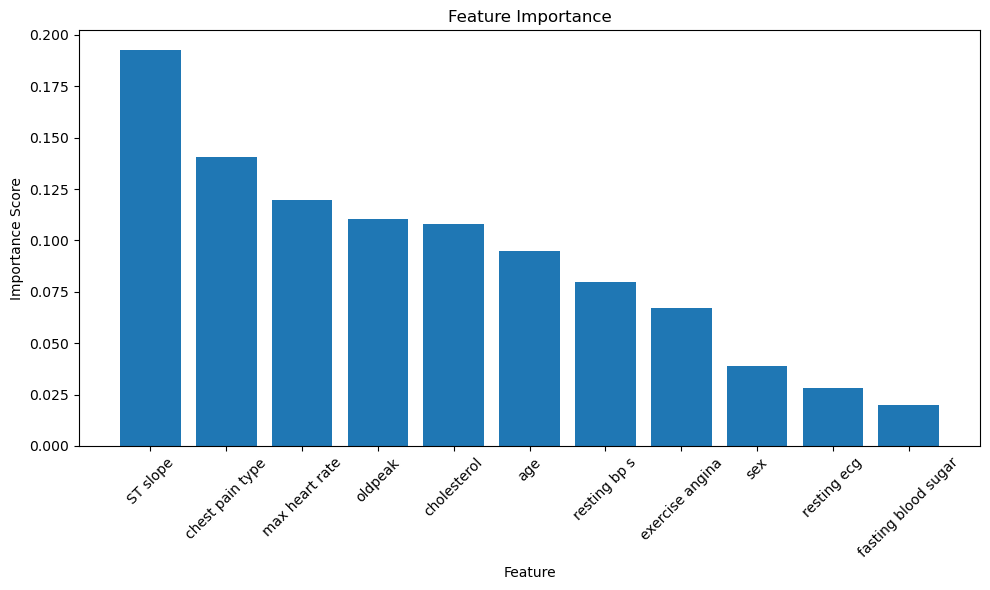

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance
importances = best_rf_model.feature_importances_
feature_names = data.columns[:-1]  # Exclude 'target'
indices = np.argsort(importances)[::-1]

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()


In [16]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# New patient's data (features)
new_patient_data = np.array([55, 1, 2, 140, 255, 0, 1, 160, 0, 1.2, 2])

# Reshape data to match the number of features in training data
new_patient_data = new_patient_data.reshape(1, -1)

# Scale the data using the same scaler used during training
new_patient_data_scaled = scaler.transform(new_patient_data)

# Make a prediction using the trained Random Forest model
prediction = rf_model.predict(new_patient_data_scaled)

# Output the prediction
if prediction == 1:
    print("The patient is likely to have heart disease.")
else:
    print("The patient is likely to be heart disease free.")


The patient is likely to have heart disease.


C:\Users\sudar\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
